### Угадываем признак

In [16]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('data/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [25]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
id             10858 non-null int64
name           10858 non-null object
nationality    10858 non-null object
sex            10858 non-null object
dob            10858 non-null object
height         10858 non-null float64
weight         10858 non-null float64
sport          10858 non-null object
gold           10858 non-null int64
silver         10858 non-null int64
bronze         10858 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [27]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [28]:
y = data['sex']

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [30]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [31]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [32]:
le.fit( data['sex'] )

LabelEncoder()

y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

#### Построим набор моделей для значений random_state от 0 до 9 (убедимся в фиксации разбиений параметром random_state). Результат каждый раз примерно одинаковый

In [63]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.7790055248618785
1: 0.7762430939226519
2: 0.783609576427256
3: 0.7869858809085328
4: 0.7624309392265194


#### Без random_state результат более волатильный

In [62]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.7774708410067526
1: 0.7786985880908532
2: 0.7802332719459791
3: 0.7912829957028852
4: 0.7667280540208717


#### Обучим модель

In [34]:
model = LogisticRegression()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import roc_curve

In [38]:
predictions = model.predict_proba(X_test)

In [42]:
model.classes_ 

array([0, 1])

In [41]:
#вероятность 0 и 1
predictions

array([[0.28632842, 0.71367158],
       [0.17916626, 0.82083374],
       [0.61635824, 0.38364176],
       ...,
       [0.77046573, 0.22953427],
       [0.13301866, 0.86698134],
       [0.26784702, 0.73215298]])

### Построим ROC-Кривую (кривая ошибок)

###### зависимость доли верных положительных классификаций от доли ложных положительных классификаций 

In [49]:
#FPR TPR
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [50]:
from matplotlib import pyplot as plt

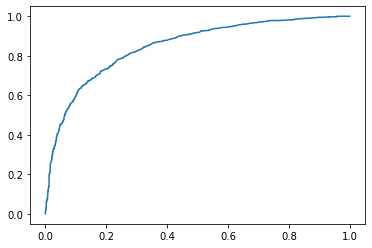

In [51]:
plt.plot( fpr, tpr )

#### Вычислим площадь под кривой  Receiver Operating Characteristic Curve (ROC AUC)

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
roc_auc_score(y_test, predictions[:, 1])

0.8479976592867495

### Precision Recall

Precision - доля правильно предсказанных
Recall - способность алгоритма обнаруживать данный класс вообще

In [76]:
from sklearn.metrics import precision_recall_curve
#precision_recall_curve перебирает пороги (вероятности предсказания) на который
#опираемся при оценке точности
precision, recall, thresholds = precision_recall_curve(y_test, predictions[:,1])

In [99]:
for line in zip( precision, recall, thresholds ):
    print( line )

(0.541743400859423, 1.0, 0.0036412261121372244)
(0.5416027018728892, 0.9994334277620397, 0.005837384954292335)
(0.5417690417690417, 0.9994334277620397, 0.006252325530429884)
(0.5419354838709678, 0.9994334277620397, 0.010091765352113476)
(0.5417947141979103, 0.9988668555240793, 0.010096675924902543)
(0.5419612665232093, 0.9988668555240793, 0.010502745683797856)
(0.5421279212792128, 0.9988668555240793, 0.015182048154764448)
(0.5419870808981851, 0.998300283286119, 0.01908651539142638)
(0.5421538461538462, 0.998300283286119, 0.020096775063075938)
(0.5423207140658665, 0.998300283286119, 0.02116625365252015)
(0.542179802955665, 0.9977337110481587, 0.021997049009111348)
(0.5420388050508161, 0.9971671388101983, 0.02229869402093036)
(0.5422057917436846, 0.9971671388101983, 0.023394962953929916)
(0.5420647149460709, 0.996600566572238, 0.02341027315098802)
(0.5422318125770653, 0.996600566572238, 0.025598953770156398)
(0.5420906567992599, 0.9960339943342776, 0.025911347321695616)
(0.54194941394201

In [78]:
from sklearn.metrics import average_precision_score

# определяет среднее значение по всем этим параметрам
average_precision_score(y_test, predictions[:, 1] )

0.525192974201876

**Построим еще одну модель и сравним их между собой**

In [89]:
Xshort = data.loc[ :, ['height', 'weight'] ]
Xshort.head()

,height,weight
0,1.72,64.0
1,1.68,56.0
2,1.98,79.0
3,1.83,80.0
4,1.81,71.0


In [90]:
model2 = LogisticRegression()
X_train_short, X_test_short, y_train, y_test = train_test_split( Xshort, y, test_size = 0.3, random_state = 0 )
model2.fit( X_train_short, y_train )

LogisticRegression()

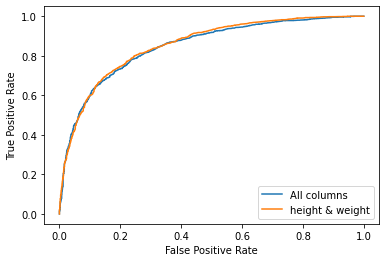

In [95]:
predictions2 = model2.predict_proba( X_test_short )
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )

plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'height & weight' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [97]:
roc_auc_score( y_test, predictions[:, 1] )

0.5180670968211865

In [98]:
roc_auc_score( y_test, predictions2[:, 1] )

0.8545148014834868